In [0]:
import pandas as pd

In [0]:
!gdown --id 1uWHjZ3y9XZKpcJ4fkSwjQJ-VDbZS-7xi --output titanic.csv

Downloading...
From: https://drive.google.com/uc?id=1uWHjZ3y9XZKpcJ4fkSwjQJ-VDbZS-7xi
To: /content/titanic.csv
100% 61.2k/61.2k [00:00<00:00, 51.4MB/s]


In [0]:
df = pd.read_csv('titanic.csv')

In [0]:
df.shape

(891, 12)

In [0]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [0]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


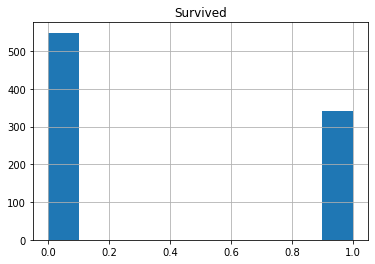

In [0]:
ax=df.hist(column='Survived')

PreProcessing

In [0]:
missing=df.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

Cabin       687
Age         177
Embarked      2
dtype: int64

In [0]:
df = df.drop(['Cabin', 'Name', 'Ticket', 'PassengerId'], axis=1)

After droping above columns, we fix missing values for Age and Embarked

In [0]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

Now that our dataset has no missing values, we need to preprocess the categorical features:

In [0]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked', 'Pclass'])

Random Search Hyper Parameter Tuning

In [0]:
def tune_optimizer_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.Dense(units=18, activation="relu", input_shape=[X_train.shape[1]]))
    model.add(keras.layers.Dense(1, activation='sigmoid'))
    optimizer = hp.Choice('optimizer', ['adam', 'sgd', 'rmsprop'])
    model.compile(
        optimizer=optimizer,
        loss = 'binary_crossentropy',
        metrics = ['accuracy'])
    return model

Now we build a Tuner

In [0]:
MAX_TRIALS = 20
EXECUTIONS_PER_TRIAL = 5
tuner = RandomSearch(
    tune_optimizer_model,
    objective='val_accuracy',
    max_trials=MAX_TRIALS,
    executions_per_trial=EXECUTIONS_PER_TRIAL,
    directory='test_dir',
    project_name='tune_optimizer',
    seed=RANDOM_SEED
)

NameError: ignored